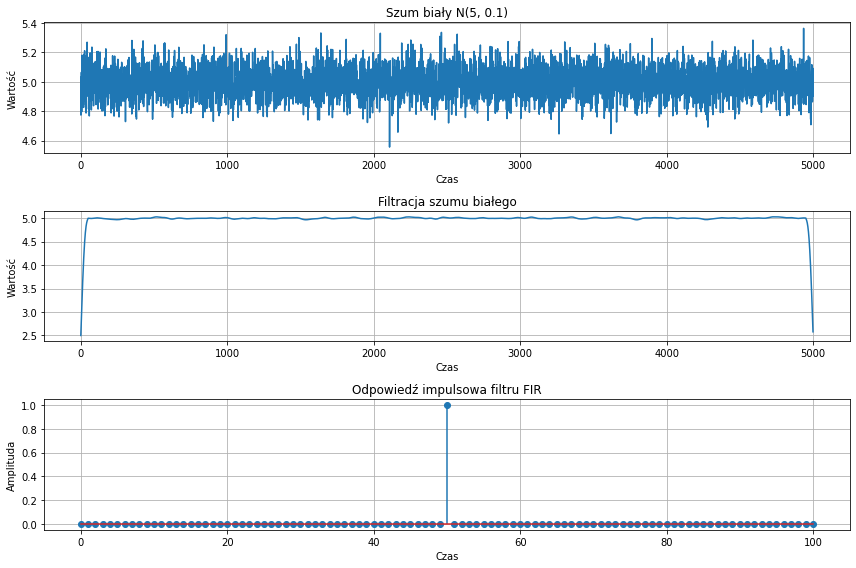

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin
from numpy.fft import fft, fftshift

mean = 5  # Średnia
std_dev = 0.1  # Odchylenie standardowe
num_samples = 5000  # Liczba próbek (długość sygnału)

# Generowanie szumu białego
white_noise = np.random.normal(mean, std_dev, num_samples)

# Projektowanie filtru FIR
cutoff_freq = 1000  # Częstotliwość odcinania w Hz
filter_order = 100  # Rząd filtru
nyquist_freq = 0.5 * 5000  # Częstotliwość Nyquista (połowa częstotliwości próbkowania)

fir_coeff = firwin(filter_order, cutoff_freq/(nyquist_freq), fs=5000)

# Filtracja szumu białego
filtered_signal = np.convolve(white_noise, fir_coeff, mode='same')

# Wygenerowanie odpowiedzi impulsowej filtra
impulse_response = np.zeros(filter_order+1)
impulse_response[filter_order // 2] = 1

filter_freq_response = fft(fir_coeff)
filter_freq_response_shifted = fftshift(filter_freq_response)

# Wyświetlanie wyników
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(white_noise)
plt.xlabel('Czas')
plt.ylabel('Wartość')
plt.title('Szum biały N(5, 0.1)')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(filtered_signal)
plt.xlabel('Czas')
plt.ylabel('Wartość')
plt.title('Filtracja szumu białego')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.stem(impulse_response)
plt.xlabel('Czas')
plt.ylabel('Amplituda')
plt.title('Odpowiedź impulsowa filtru FIR')
plt.grid(True)

plt.tight_layout()
plt.show()
